In [1]:
#importamos las librerias para operacion entre vectores y para graficos
import numpy as np
import matplotlib.pyplot as plt

In [2]:

#vamos a calcular el campo eléctrico en un punto a una distancia p=(x,y) de la carga q1
q_1=4
c_x=2
c_y=4
c_x_q1=15
c_y_q1=0
def campo_electrico(q_1,c_x,c_y,c_x_q1,c_y_q1): #se ingresan los valores de la carga,la coordenada x y y del punto y la coordenada x y y de la carga
  k= 9E+9
  dx = c_x - c_x_q1 #delta de x
  dy = c_y - c_y_q1#delta de y
  v1 = np.array([c_x_q1,c_y_q1]) #punto donde esta q1, origen
  v2 = np.array([c_x,c_y]) #punto donde vamos a calcular el campo
  distancia = v2 - v1 #calculamos la distancia de la carga al punto
  m = np.linalg.norm(distancia) # y le sacamos el modulo
  u_x = dx/m #calculamos el delta de x para la componente x del campo
  u_y = dy/m #igualmente para la componente y
  E_x = ((k*q_1)/m**2)*u_x #calculamos la componente x y la componente y del campo
  E_y = ((k*q_1)/m**2)*u_y
  E = np.array([E_x,E_y])
  return E
campo1=campo_electrico(q_1,c_x,c_y,c_x_q1,c_y_q1)
print(campo1)

[-1.85989429e+08  5.72275165e+07]


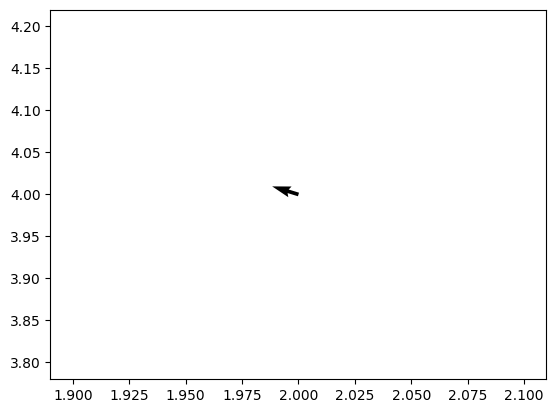

In [3]:
#graficamos el vector que tenemos de campo elétrico
plt.quiver(c_x,c_y,campo1[0],campo1[1])
plt.show()


In [6]:
#vamos a crear una funcion que me calcule en cada punto del espacio el campo electrico de un dipolo, es decir el campo total producido por una carga positiva y una negativa

c_x_q2 = 5
c_y_q2 = 0
def campo_total(q_1,c_x,c_y,c_x_q1,c_y_q1,c_x_q2,c_y_q2):
  q_2 = -q_1
  Et = campo_electrico(q_1,c_x,c_y,c_x_q1,c_y_q1) + campo_electrico(q_2,c_x,c_y,c_x_q2,c_y_q2)
  return Et

campot = campo_total(q_1,c_x,c_y,c_x_q1,c_y_q1,c_x_q2,c_y_q2)
print(campot)


[ 6.78010571e+08 -1.09477248e+09]


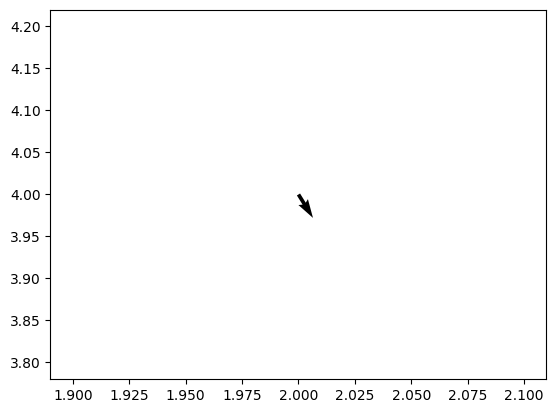

In [7]:
#grafico del campo total
plt.quiver(c_x,c_y,campot[0],campot[1])
plt.show()

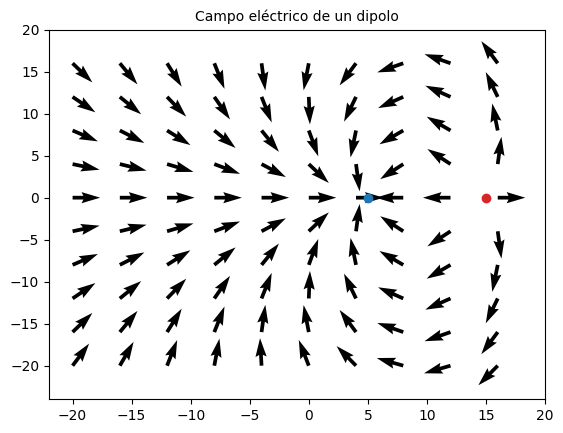

In [36]:
#ahora vamos a graficar el campo electrico en cada punto del espacio

x = np.arange(-20,20,4) #arreglo de vector con 20 elementos
y = np.arange(-20,20,4)

fig, ax = plt.subplots()
for i in x:
  for k in y:
    campitos = campo_total(q_1,i,k,c_x_q1,c_y_q1,c_x_q2,c_y_q2)
    plt.quiver(i,k,campitos[0],campitos[1])

ax.scatter(x = [c_x_q1], y = [c_y_q1], color = "tab:red")
ax.scatter(x = [c_x_q2], y = [c_y_q2], color = "tab:blue")
plt.title("Campo eléctrico de un dipolo", fontsize=10)
plt.xlim(-22,20)
plt.ylim(-24,20)
plt.show()
